In [1]:
!pip install SHAP

   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   ------------------------ --------------- 276.5/447.3 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 7.0 MB/s eta 0:00:00


DEPRECATION: fairness 0.1.8 has a non-standard dependency specifier BlackBoxAuditing>=0.1.26ggplot. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of fairness or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
import shap
import numpy as np
import pandas as pd

In [14]:
shap.initjs()
customers = pd.read_csv('../SHAP & LIME/Customer Churn.csv')
customers.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [17]:
customers.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
FN                         2654
FP                         2195
Churn                         2
dtype: int64

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [19]:
X = customers.drop(['Churn'], axis=1)
y = customers['Churn']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       783
           1       0.93      0.73      0.82       162

    accuracy                           0.94       945
   macro avg       0.94      0.86      0.89       945
weighted avg       0.94      0.94      0.94       945



In [26]:
explainer = shap.Explainer(clf)

In [27]:
shape_values = explainer.shap_values(X_test)

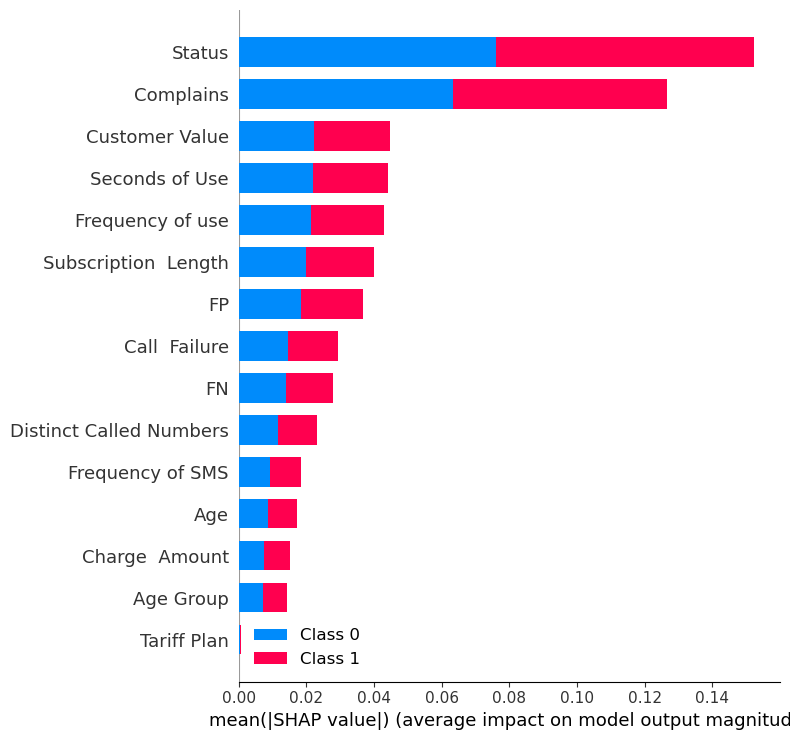

In [28]:
shap.summary_plot(shape_values, X_test, plot_type='bar')

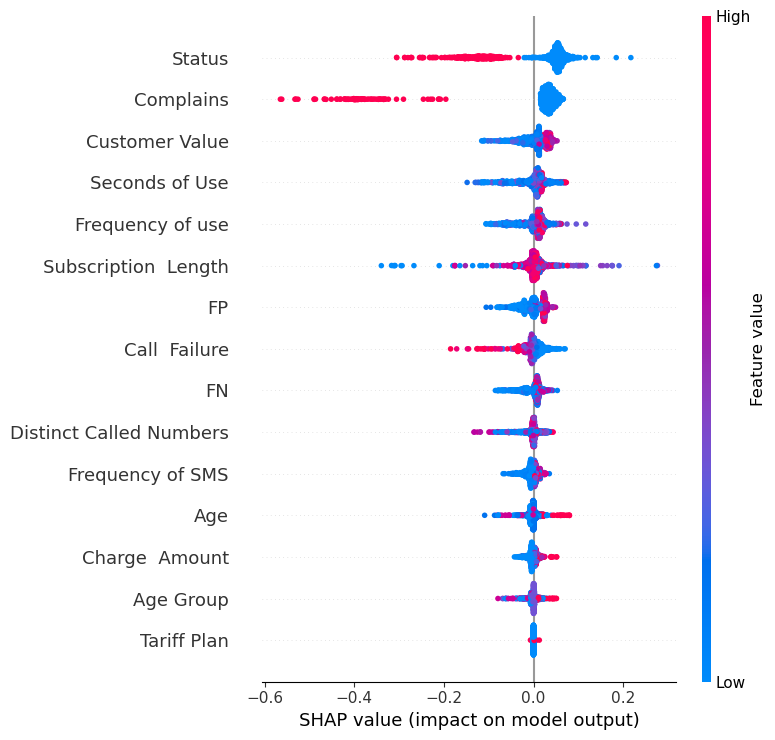

In [29]:
shap.summary_plot(shape_values[0], X_test)

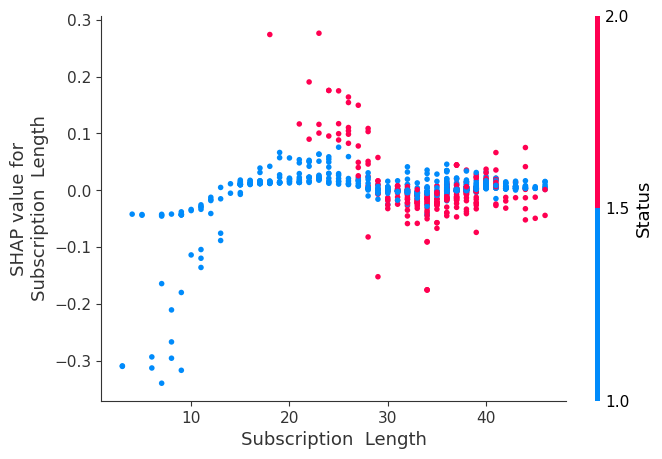

In [31]:
shap.dependence_plot('Subscription  Length', shape_values[0], X_test)

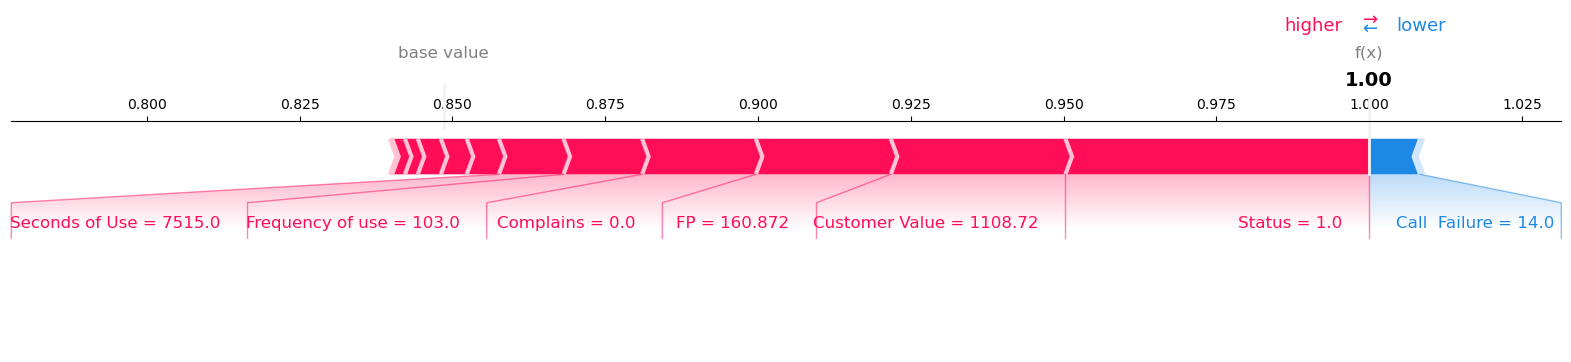

In [32]:
shap.force_plot(explainer.expected_value[0], shape_values[0][0,:], X_test.iloc[0,:], matplotlib=True)

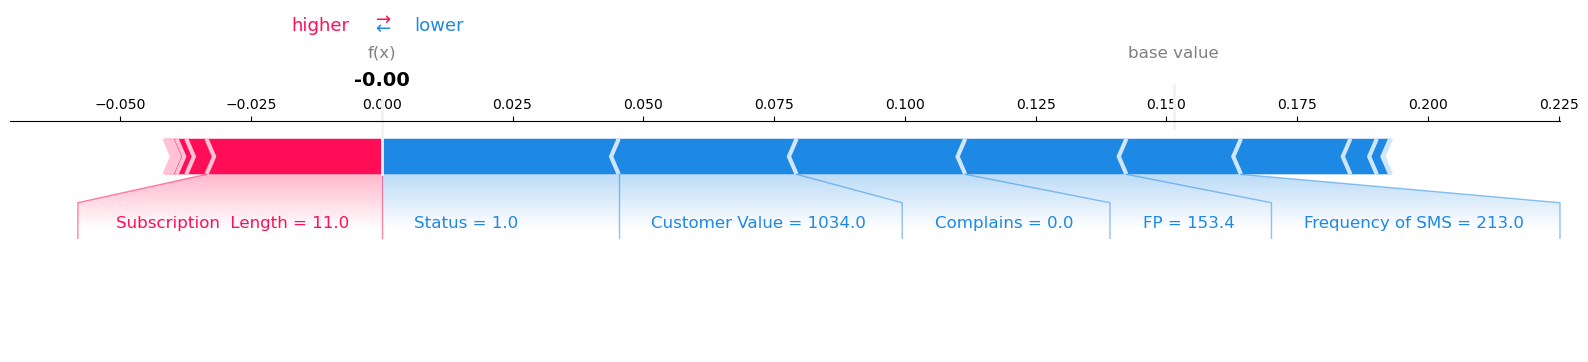

In [34]:
shap.force_plot(explainer.expected_value[1], shape_values[1][6,:], X_test.iloc[6,:], matplotlib=True)

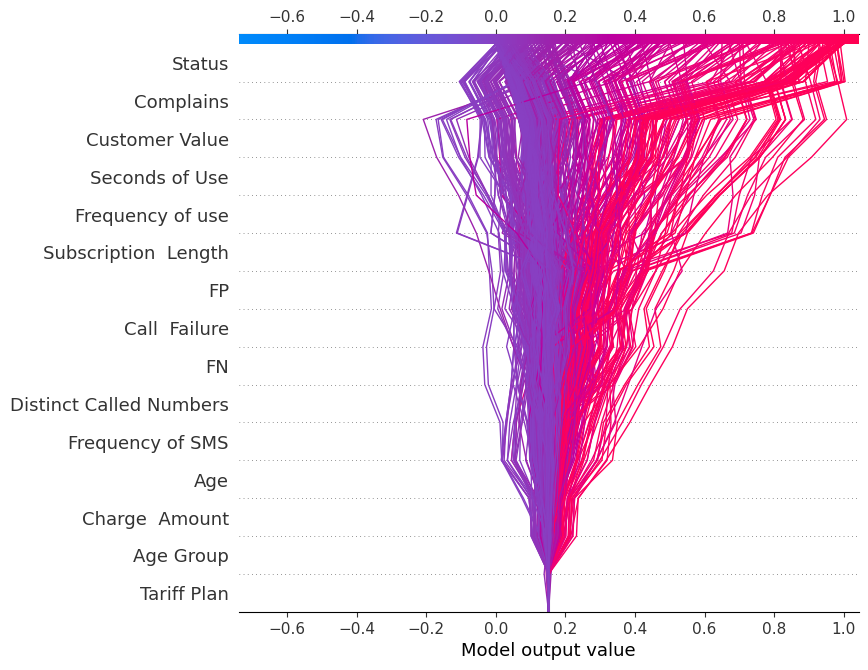

In [35]:
shap.decision_plot(explainer.expected_value[1], shape_values[1], X_test.columns)

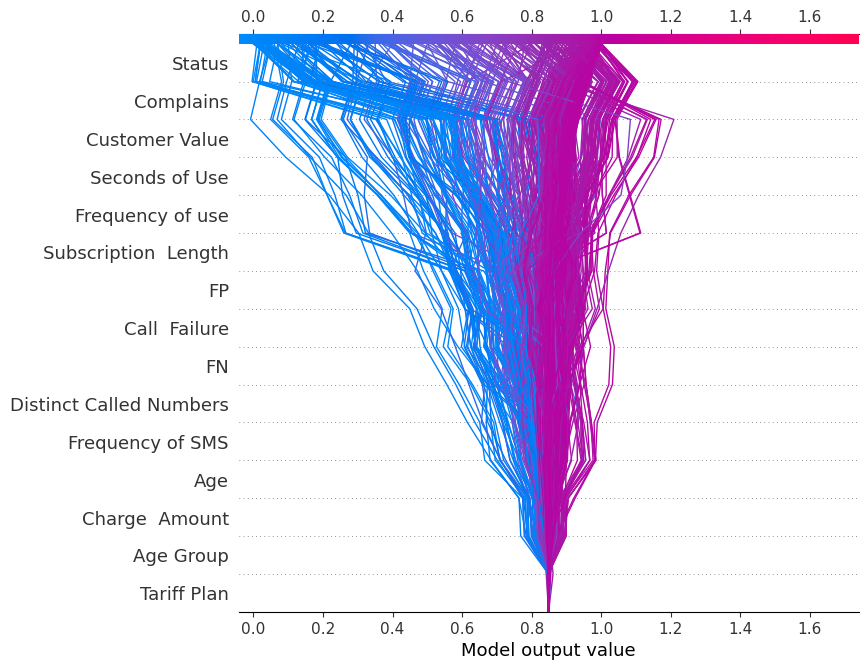

In [36]:
shap.decision_plot(explainer.expected_value[0], shape_values[0], X_test.columns)